<a href="https://colab.research.google.com/github/ThanhNhu-20104049/Nhan-dien-hoa/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/FL/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 177 images belonging to 3 classes.


In [5]:
# Tạo bộ dữ liệu test
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/FL/Validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 18 images belonging to 3 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [7]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{'Cam tu cau': 0, 'Hoa cuc': 1, 'Hoa lan': 2}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [9]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/50
6/6 [==============================] - 82s 13s/step - loss: 1.5754 - accuracy: 0.3503 - val_loss: 1.0866 - val_accuracy: 0.3333
Epoch 2/50
6/6 [==============================] - 62s 10s/step - loss: 1.0974 - accuracy: 0.4011 - val_loss: 1.0393 - val_accuracy: 0.3333
Epoch 3/50
6/6 [==============================] - 63s 10s/step - loss: 1.0117 - accuracy: 0.5367 - val_loss: 0.7541 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 66s 11s/step - loss: 0.8812 - accuracy: 0.6045 - val_loss: 0.7091 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 62s 10s/step - loss: 0.6796 - accuracy: 0.7006 - val_loss: 0.4982 - val_accuracy: 0.7222
Epoch 6/50
6/6 [==============================] - 62s 10s/step - loss: 0.5180 - accuracy: 0.7571 - val_loss: 0.2796 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 61s 10s/step - loss: 0.5024 - accuracy: 0.8531 - val_loss: 0.1242 - val_accuracy: 0.9444
Epoch 8/50
6/6 [===========

In [11]:
# Lưu lại
model.save("Nhan_dien_hoa.h5")

In [12]:
# Tải mô hình 
model_fl=load_model('Nhan_dien_hoa.h5')

In [13]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.032751038670539856
Train Accuracy 0.9830508232116699


<function matplotlib.pyplot.show(*args, **kw)>

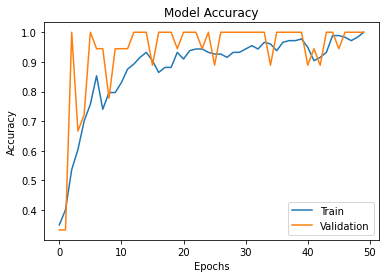

In [14]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 383ms/step
Hoa cuc


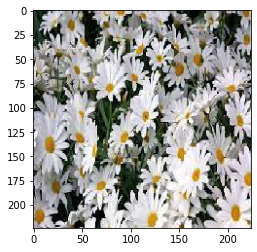

1/1 [==============================] - 0s 108ms/step
Hoa cuc


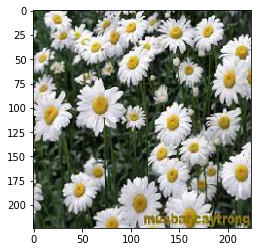

1/1 [==============================] - 0s 106ms/step
Cam tu cau


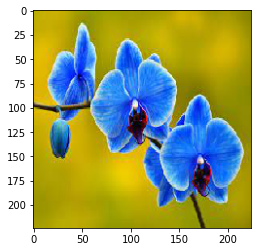

1/1 [==============================] - 0s 108ms/step
Hoa lan


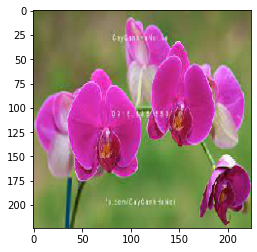

1/1 [==============================] - 0s 106ms/step
Hoa lan


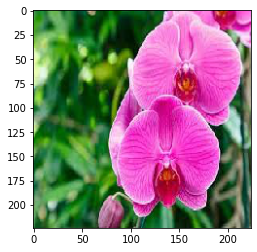

1/1 [==============================] - 0s 120ms/step
Cam tu cau


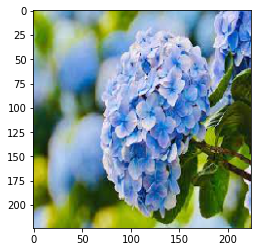

1/1 [==============================] - 0s 121ms/step
Cam tu cau


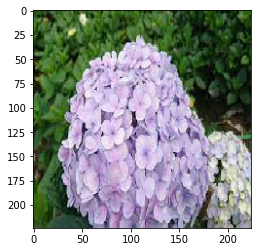

1/1 [==============================] - 0s 112ms/step
Cam tu cau


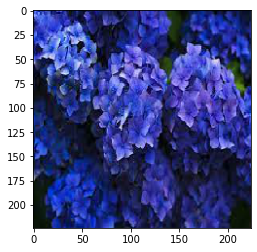

1/1 [==============================] - 0s 110ms/step
Cam tu cau


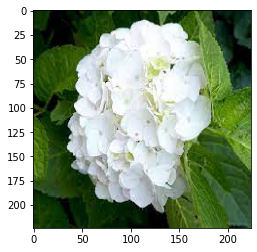

In [17]:
import os
# Tạo bộ dữ liệu test
test = '/content/drive/My Drive/Colab Notebooks/BTVN/FL/Test'
dict = list(training_set.class_indices.keys())

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_fl.predict(img)

  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(prediction)
      plt.show()
  

1/1 [==============================] - 0s 115ms/step
[[0.22577092 0.13515374 0.63907534]]
1/1 [==============================] - 0s 81ms/step
Hoa Lan


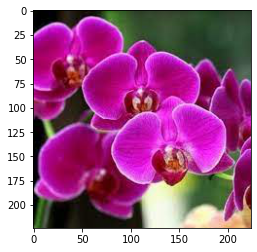

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
import matplotlib.pyplot as plt

img = load_img('lan (58).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224*224*3)
class_names = ["Cẩm Tú Cầu", "Hoa Cúc", "Hoa Lan"]
print(model_ANN.predict(img))
print(class_names[np.argmax(model_ANN.predict(img))])

1/1 [==============================] - 0s 88ms/step
[[0.27216116 0.4348849  0.292954  ]]
1/1 [==============================] - 0s 93ms/step
Hoa Cúc


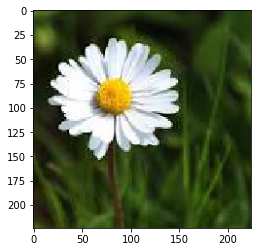

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('1.jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224*224*3)
class_names = ["Cẩm Tú Cầu", "Hoa Cúc", "Hoa Lan"]
print(model_ANN.predict(img))
print(class_names[np.argmax(model_ANN.predict(img))])

1/1 [==============================] - 0s 104ms/step
[[0.4548485 0.3489955 0.196156 ]]
1/1 [==============================] - 0s 79ms/step
Cẩm Tú Cầu


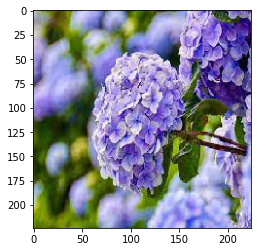

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('lan (58).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224*224*3)
class_names = ["Cẩm Tú Cầu", "Hoa Cúc", "Hoa Lan"]
print(model_ANN.predict(img))
print(class_names[np.argmax(model_ANN.predict(img))])

In [18]:
!jupyter nbconvert --to html "/content/Nhận_diện_hoa (1).ipynb"

[NbConvertApp] Converting notebook /content/Nhận_diện_hoa (1).ipynb to html
[NbConvertApp] Writing 1971239 bytes to /content/Nhận_diện_hoa (1).html
